In [1]:
import numpy as np
import pandas as pd
import unittest
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
class Integral:
    def __init__(self, a, b, e):
        self.a = a
        self.b = b
        self.e = e
        
    @property
    def a(self):
        return self._a
    
    @a.setter
    def a(self, a):
        self._a = a
        
    @property
    def b(self):
        return self._b
    
    @b.setter
    def b(self, b):
        if b < self.a:
            raise ValueError('b must be greater than a')
        self._b = b
    
    @property
    def e(self):
        return self._e
    
    @e.setter
    def e(self, e):
        if e < 0:
            raise ValueError('e must be greater than 0')
        self._e = e
       
    def rectangle_integral(self, f, steps=1000):
        res1 = sum([f(i) for i in np.linspace(self.a, self.b, steps)]) * self.b / steps
        steps *= 2
        res2 = sum([f(i) for i in np.linspace(self.a, self.b, steps)]) * self.b / steps
        
        while abs(res1 - res2) > self.e:
            res1 = res2
            steps *= 2
            res2 = sum([f(i) for i in np.linspace(self.a, self.b, steps)]) * self.b / steps
        
        return round(res2, int(np.log10(1/self.e)))

In [3]:
class Laguerre:
    def __init__(self, beta, sigma):
        self.beta = beta
        self.sigma = sigma
    
    @property
    def beta(self):
        return self._beta
    
    @beta.setter
    def beta(self, beta):
        if beta < 0:
            raise ValueError('beta must be greater than 0')
        self._beta = beta
        
    @property
    def sigma(self):
        return self._sigma
    
    @sigma.setter
    def sigma(self, sigma):
        if sigma < self.beta:
            raise ValueError('sigma must be greater than beta')
        self._sigma = sigma
        
    #Task 1
    def laguerre_function(self, t, n):
        l_0 = np.sqrt(self.sigma) * np.exp(-self.beta * t / 2)
        l_1 = np.sqrt(self.sigma) * (1 - self.sigma * t) * np.exp(-self.beta * t / 2)

        if n == 0:
            return l_0
        if n == 1:
            return l_1
        if n >= 2:
            l_next = (2 * 2 - 1 - t * self.sigma) / 2 * l_1 - (2 - 1) / 2 * l_0
            for j in range(3, int(n+1)):
                l_0 = l_1
                l_1 = l_next
                l_next = (2 * j - 1 - t * self.sigma) / j * l_1 - (j - 1) / j * l_0
            return l_next
    
    #Task 2
    def tabulate_laguerre(self, T, n, step = 0.1):
        values = np.arange(0, T, step)
        results = []
        for i in values:
            results.append(self.laguerre_function(i, n))
        
        return pd.DataFrame(data = {'value': values, f'L_{n}': results})
    
    #Task 4
    def transform_laguerre(self, f, T, N):
        ns = np.linspace(0, N, N+1)
        results = []
        
        for i in ns:
            def func(f,i):
                return lambda x: f(x) * self.laguerre_function(x, i) * np.exp(-(self.sigma - self.beta) * x)
            results.append(Integral(0,T,0.0001).rectangle_integral(func(f,i)))
        
        df = pd.DataFrame({'N' : ns, 'f' : results})
        return df
    
    #Task 6
    def reversed_transform_laguerre(self, seq, t):
        sum_res = 0
    
        for i in range(0, len(seq)):
            sum_res += seq[i] * self.laguerre_function(t, i)
        
        return sum_res

In [4]:
#Task 3
class Experiment:
    def __init__(self, laguerre):
        self.laguerre = laguerre
        
    @property
    def laguerre(self):
        return self._laguerre
    
    @laguerre.setter
    def laguerre(self, laguerre):
        if not isinstance(laguerre, Laguerre):
            raise ValueError('laguerre must be an instance of Laguerre')
        self._laguerre = laguerre
        
    def experiment(self, T, N=20, eps=0.001):
        t = np.linspace(0, T, 1000)
        for i in t:
            for n in np.linspace(0, N, N+1):
                if abs(self.laguerre.laguerre_function(i, n)) < eps:
                    check = True
                else:
                    check = False
                    break
            if check:
                iss = [i] * (N+1)
                laggers = []
                ns = []
                for n in np.linspace(0, N, N+1):
                    laggers.append(self.laguerre.laguerre_function(i,n))
                    ns.append(n)
                df = pd.DataFrame({'t' : iss, 'n' : ns, 'lagger' : laggers})
                return df, i

In [5]:
#Task 5
def f(x):
    if x>=2*np.pi:
        return 0
    else:
        return np.sin(x-np.pi/2)+1

In [6]:
laguerre = Laguerre(2, 4)
exp = Experiment(laguerre)
df, ans = exp.experiment(100)
laguerre.transform_laguerre(f, ans, 20)

,N,f
0,0.0,0.0666
1,1.0,-0.1821
2,2.0,0.1780
3,3.0,-0.0743
4,4.0,0.0073
5,5.0,0.0076
6,6.0,-0.0031
7,7.0,-0.0006
8,8.0,0.0008
9,9.0,-0.0000


In [7]:
class Graph:
    def __init__(self, laguerre, f, T, N):
        self.laguerre = laguerre
        self.f = f
        self.T = T
        self.N = N
        
    @property
    def laguerre(self):
        return self._laguerre
    
    @laguerre.setter
    def laguerre(self, laguerre):
        if not isinstance(laguerre, Laguerre):
            raise ValueError('laguerre must be an instance of Laguerre')
        self._laguerre = laguerre
        
    @property
    def f(self):
        return self._f
    
    @f.setter
    def f(self, f):
        self._f = f
        
    @property
    def T(self):
        return self._T
    
    @T.setter
    def T(self, T):
        self._T = T
        
    @property
    def N(self):
        return self._N
    
    @N.setter
    def N(self, N):
        self._N = N
    
    #Task 7
    @property
    def tabulation_graph(self):
        df = self.laguerre.tabulate_laguerre(self.T, self.N)
        plt.plot(df['value'], df[f'L_{self.N}'])
        plt.xlabel('value')
        plt.ylabel('laguerre')
        plt.title('Laguerre tabulation')
        plt.show()
        
    #Task 8
    @property
    def graph(self):
        transform_v = self.laguerre.transform_laguerre(f, ans, 10)['f']
        reversed_transform_v = []
        func_v = []
        
        for t in np.linspace(0, (2*np.pi), 100):
            reversed_transform_v.append(self.laguerre.reversed_transform_laguerre(transform_v, t))
            func_v.append(f(t))
        
        fig, (p1, p2, p3) = plt.subplots(3, 1, figsize = (8,12))
        
        p1.plot(np.linspace(0, (2*np.pi), 100), reversed_transform_v)
        p2.plot(np.linspace(0, (2*np.pi), 100), func_v)
        p3.plot(np.linspace(0, (2*np.pi), 100), reversed_transform_v, label='Reversed Transform')
        p3.plot(np.linspace(0, (2*np.pi), 100), func_v, label='Function')
        
        p1.set_title('Reversed Transform')
        p2.set_title('Function')
        p3.set_title('Reversed Transform and Function')
        p3.legend()
        plt.show()

In [8]:
class Widgets:
    def __init__(self, laguerre,):
        self.laguerre = laguerre
        
    def tabulate_laguerre_wd(self):
        wd1 = widgets.IntSlider(min=1, max=20, value=1)
        wd2 = widgets.IntSlider(min=1, max=10, value=1)
        widgets.interact(laguerre.tabulate_laguerre, T = wd1, n = wd2, beta = widgets.fixed(2), sigma = widgets.fixed(4), step = widgets.fixed(0.001))
        
    def tabulate_laguerre_graph_wd(self):
        wdp1 = widgets.IntSlider(min=1, max=20, value=1)
        wdp2 = widgets.IntSlider(min=1, max=10, value=1)
        
        def tab_graf(t,n):
            df = laguerre.tabulate_laguerre(t, n)
            plt.plot(df['value'], df[f'L_{n}'])
            plt.xlabel('values')
            plt.ylabel('laguerre')
            plt.title('Laguerre tabulation')
            plt.show()
        
        widgets.interact(tab_graf, t=wdp1, n=wdp2)

In [9]:
Widgets(Laguerre(2, 4)).tabulate_laguerre_wd()

interactive(children=(IntSlider(value=1, description='T', max=20, min=1), IntSlider(value=1, description='n', …

In [10]:
Widgets(Laguerre(2, 4)).tabulate_laguerre_graph_wd()

interactive(children=(IntSlider(value=1, description='t', max=20, min=1), IntSlider(value=1, description='n', …

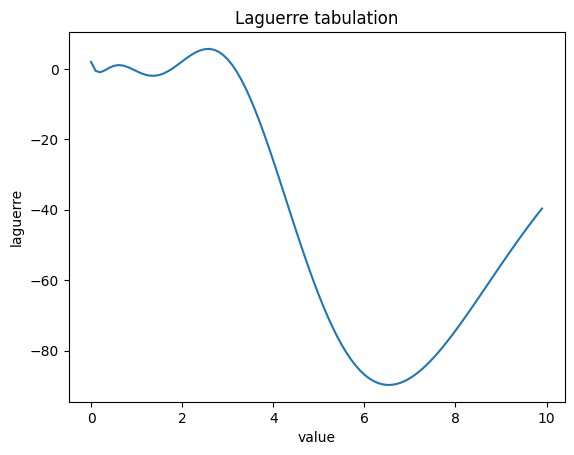

In [11]:
g = Graph(Laguerre(2, 4), f, 10, 5)
g.tabulation_graph

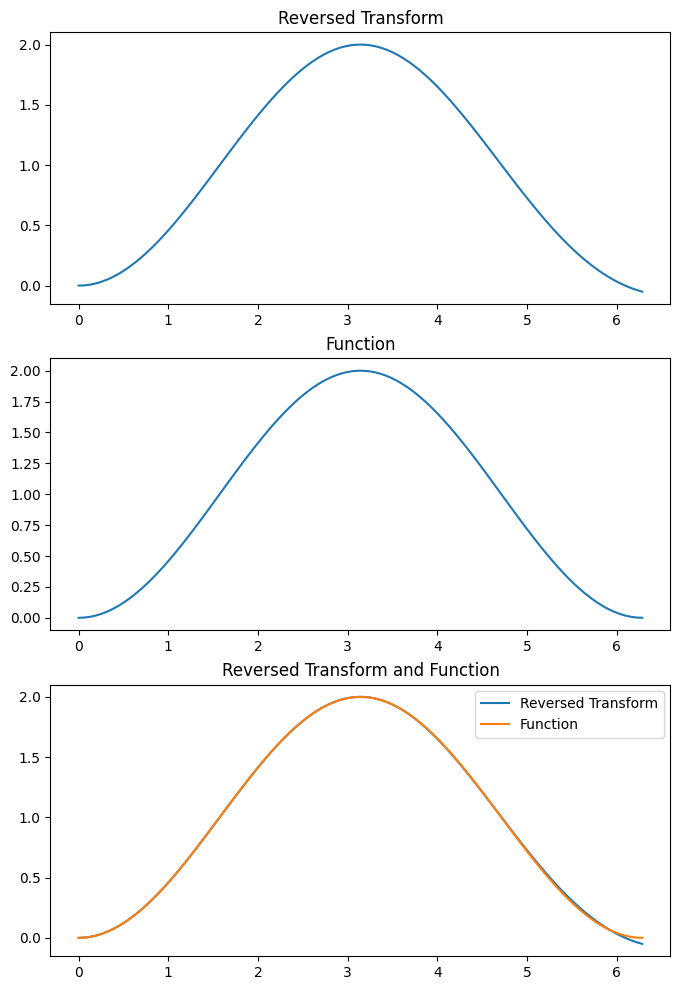

In [12]:
g.graph

In [13]:
class TestIntegral(unittest.TestCase):
    def test_rectangle_integral(self):
        integral = Integral(0, 10, 0.001)
        self.assertEqual(integral.rectangle_integral(lambda x: x**2), 333.334)
        self.assertEqual(integral.rectangle_integral(lambda x: x**3), 2500.001)
        self.assertEqual(integral.rectangle_integral(lambda x: np.sin(x)), 1.839)

In [14]:
class TestLaguerre(unittest.TestCase):            
    def test_laguerre_function(self):
        laguerre = Laguerre(2, 4)
        self.assertEqual(laguerre.laguerre_function(3, 5), 2.728331346558944)
        self.assertEqual(laguerre.laguerre_function(0, 0), 2)
        
    def test_tabulate_laguerre(self):
        laguerre = Laguerre(2, 4)
        self.assertEqual(laguerre.tabulate_laguerre(10, 5).shape, (100, 2))
        
    def test_transform_laguerre(self):
        laguerre = Laguerre(2, 4)
        self.assertEqual(laguerre.transform_laguerre(f, 10, 20).shape, (21, 2))
        self.assertEqual(laguerre.transform_laguerre(f, 10, 20)['f'][0], 0.0666)
        
    def test_reversed_transform_laguerre(self):
        laguerre = Laguerre(2, 4)
        self.assertEqual(laguerre.reversed_transform_laguerre(laguerre.transform_laguerre(f, 10, 20)['f'], np.pi), 1.999286356693321)

In [15]:
class TestExperiment(unittest.TestCase):
    def test_experiment(self):
        laguerre = Laguerre(2, 4)
        exp = Experiment(laguerre)
        df, ans = exp.experiment(100)
        
        self.assertEqual(df.shape, (21, 3))
        self.assertEqual(df['lagger'][0], 9.066137838279844e-35)
        self.assertEqual(df['lagger'][20], 0.0009699020960047248)

In [16]:
class TestGraph(unittest.TestCase):
    def test_tabulation_graph(self):
        g = Graph(Laguerre(2, 4), f, 10, 5)
        g.tabulation_graph
        
    def test_graph(self):
        g = Graph(Laguerre(2, 4), f, 10, 5)
        g.graph

.

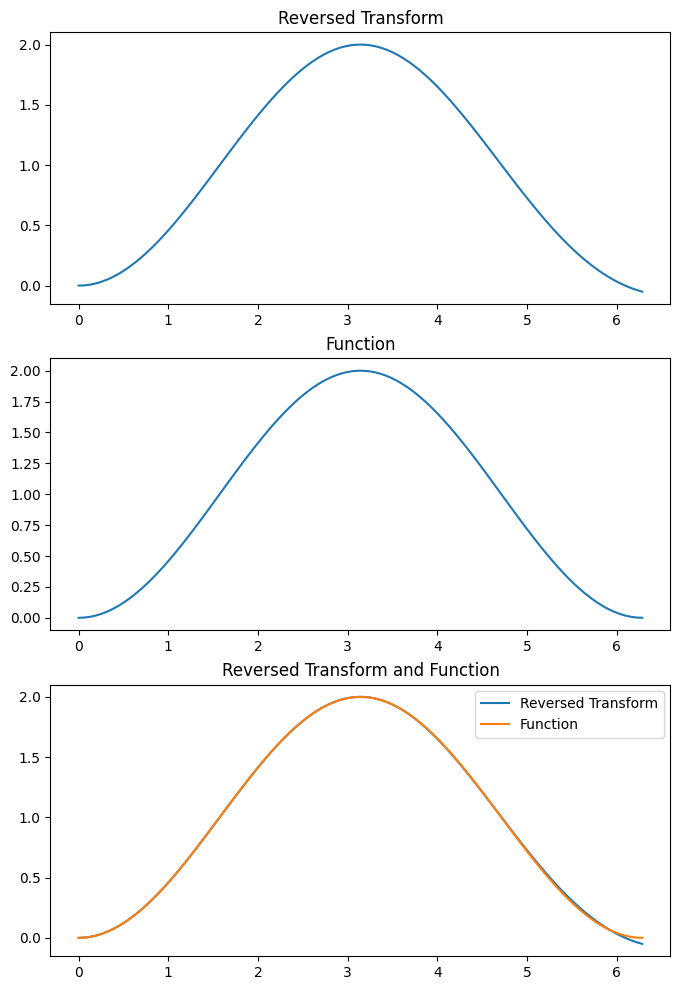

.

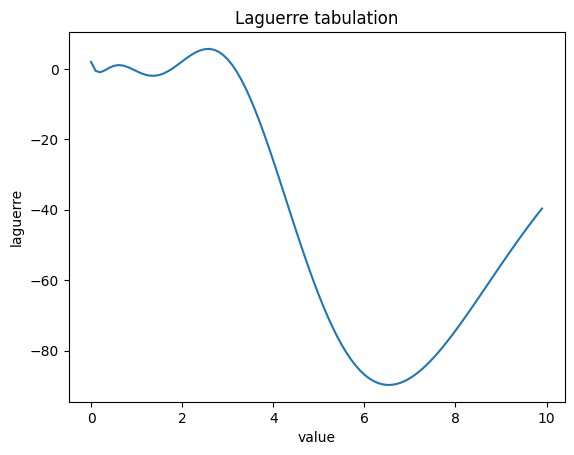

......
----------------------------------------------------------------------
Ran 8 tests in 7.620s

OK


In [17]:
unittest.main(argv=[''], exit=False)